In [4]:
#Part 1
import cv2
from PIL import Image
from pylab import *
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize

paper = []
paper.append(cv2.imread('Sunshine/9 paper 1_15.jpeg', cv2.IMREAD_COLOR))
print(paper)
b, g, r = cv2.split(paper[0])
bf = b.flatten()
gf = g.flatten()
rf = r.flatten()
brightnessB = sum(bf) / len(bf)
brightnessG = sum(gf) / len(gf)
brightnessR = sum(rf) / len(rf)
print(int(brightnessB), int(brightnessG), int(brightnessR))
hist(bf, 25)

[array([[[131, 133, 133],
        [132, 134, 134],
        [133, 135, 135],
        ...,
        [148, 143, 142],
        [147, 142, 141],
        [139, 134, 133]],

       [[132, 134, 134],
        [133, 135, 135],
        [133, 135, 135],
        ...,
        [149, 144, 143],
        [150, 145, 144],
        [146, 141, 140]],

       [[131, 133, 133],
        [132, 134, 134],
        [133, 135, 135],
        ...,
        [147, 142, 141],
        [146, 141, 140],
        [141, 136, 135]],

       ...,

       [[129, 131, 131],
        [129, 131, 131],
        [128, 130, 130],
        ...,
        [146, 143, 139],
        [145, 142, 138],
        [146, 143, 139]],

       [[127, 129, 129],
        [128, 130, 130],
        [128, 130, 130],
        ...,
        [145, 142, 138],
        [145, 142, 138],
        [144, 141, 137]],

       [[128, 130, 130],
        [128, 130, 130],
        [128, 130, 130],
        ...,
        [145, 142, 138],
        [146, 143, 139],
        [144, 141, 137]

(array([1.300000e+01, 1.400000e+02, 3.820000e+02, 2.938000e+03,
        1.661600e+04, 2.677260e+05, 6.684720e+05, 5.925720e+05,
        9.025890e+05, 6.018130e+05, 9.980200e+05, 1.407919e+06,
        1.562337e+06, 3.263027e+06, 1.892815e+06, 3.600148e+06,
        2.538754e+06, 1.306791e+06, 3.378770e+05, 8.140000e+02,
        8.400000e+01, 7.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00]),
 array([113. , 115.6, 118.2, 120.8, 123.4, 126. , 128.6, 131.2, 133.8,
        136.4, 139. , 141.6, 144.2, 146.8, 149.4, 152. , 154.6, 157.2,
        159.8, 162.4, 165. , 167.6, 170.2, 172.8, 175.4, 178. ]),
 <a list of 25 Patch objects>)

In [5]:
#determin if picture has saturated pixels
def isSaturated(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 255:
                print('saturated')
                return False
    return True
print(isSaturated(b))

True


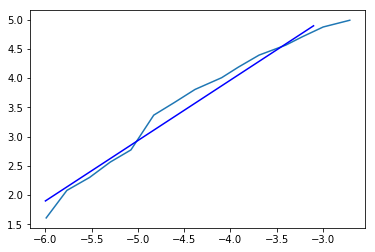

1.0329288013749802 8.097550800083395


In [6]:
#plate the figures
#curve fit
def lineTB(x, A, B):
    return A * x + B

T = [1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15]#, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4]#, 0.3]
logT = [math.log(T[i]) for i in range(len(T))]
brightnessB = [5, 8, 10, 13, 16, 29, 36, 45, 55, 66, 81, 96, 111, 131, 147]#, 155, 163, 174, 188, 205, 223]#, 242]
brightnessG = [9, 11, 14, 18, 24, 29, 36, 45, 55, 66, 81, 96, 111, 130, 148]#, 164, 183, 194, 212, 227, 238]#, 247]
brightnessR = [10, 12, 16, 21, 28, 28, 36, 45, 55, 66, 81, 96, 111, 130, 148]#, 171, 197, 217, 228, 241, 249]#, 254]
logBrightnessB = [math.log(brightnessB[i]) for i in range(len(brightnessB))]
logBrightnessG = [math.log(brightnessG[i]) for i in range(len(brightnessG))]
logBrightnessR = [math.log(brightnessR[i]) for i in range(len(brightnessR))]

#blue channel
aB, kB = optimize.curve_fit(lineTB, logT, logBrightnessB)[0]
xB = np.arange(-6, -3, 0.1)
yB = aB * xB + kB
plt.plot(logT, logBrightnessB)
plt.plot(xB, yB, 'blue')
plt.xlabel('')
plt.ylabel('')
plt.show()
print(aB, kB)
#figureTB(logT, logBrightnessG)

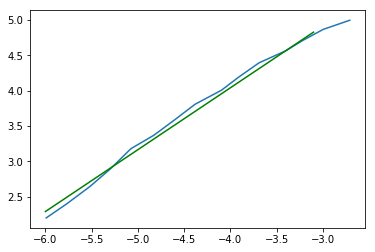

0.8762653147101003 7.545079261710296


In [7]:
#green channe
aG, kG = optimize.curve_fit(lineTB, logT, logBrightnessG)[0]
xG = np.arange(-6, -3, 0.1)
yG = aG * xG + kG
plt.plot(logT, logBrightnessG)
plt.plot(xG, yG, 'green')
plt.show()
print(aG, kG)

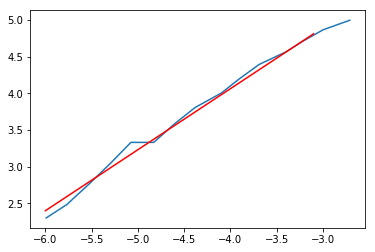

0.8312343999161413 7.388417123292613


In [8]:
#red channe
aR, kR = optimize.curve_fit(lineTB, logT, logBrightnessR)[0]
xR = np.arange(-6, -3, 0.1)
yR = aR * xR + kR
plt.plot(logT, logBrightnessR)
plt.plot(xR, yR, 'red')
plt.show()
print(aR, kR)

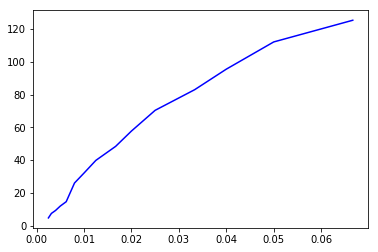

In [9]:

bPrimeB = [brightnessB[i] ** (1 / aB) for i in range(len(brightnessB))]
bPrimeG = [brightnessG[i] ** (1 / aG) for i in range(len(brightnessG))]
bPrimeR = [brightnessR[i] ** (1 / aR) for i in range(len(brightnessR))]
plt.plot(T, bPrimeB, 'blue')

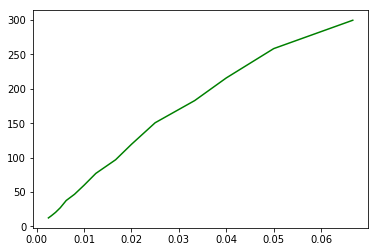

In [10]:
plt.plot(T, bPrimeG, 'green')

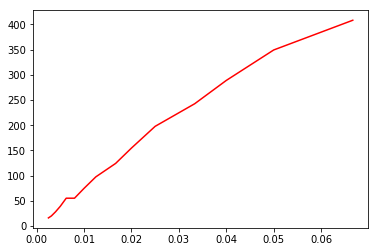

In [11]:
plt.plot(T, bPrimeR, 'red')

In [12]:
def figureTB(t, brightness):
    x = t
    y = brightness
    plt.figure()
    plt.plot(x, y)
    #plt.savefig('x.jpg')

0.7707581326934863 6.864457973176919


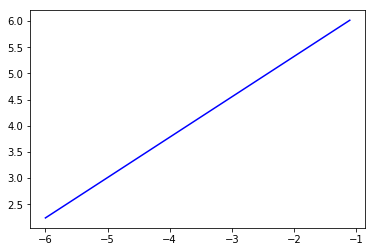

In [13]:
#curve fit
def lineTB(x, A, B):
    return A * x + B

T = [1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 0.3]
logT = [math.log(T[i]) for i in range(len(T))]
brightnessB = [5, 8, 10, 13, 16, 29, 36, 45, 55, 66, 81, 96, 111, 131, 147, 155, 163, 174, 188, 205, 223, 242]
brightnessG = [9, 11, 14, 18, 24, 29, 36, 45, 55, 66, 81, 96, 111, 130, 148, 164, 183, 194, 212, 227, 238, 247]
brightnessR = [10, 12, 16, 21, 28, 28, 36, 45, 55, 66, 81, 96, 111, 130, 148, 171, 197, 217, 228, 241, 249, 254]
logBrightnessB = [math.log(brightnessB[i]) for i in range(len(brightnessB))]
logBrightnessG = [math.log(brightnessG[i]) for i in range(len(brightnessG))]
logBrightnessR = [math.log(brightnessR[i]) for i in range(len(brightnessR))]
A1, B1 = optimize.curve_fit(lineTB, logT, logBrightnessB)[0]
x1 = np.arange(-6, -1, 0.1)
y1 = A1 * x1 + B1
plt.plot(x1, y1, 'blue')
print(A1, B1)

['27 paper 1_1000.jpeg', '26 paper 1_800.jpeg', '25 paper 1_640.jpeg', '24 paper 1_500.jpeg', '23 paper 1_400.jpeg', '22 paper 1_320.jpeg', '21 paper 1_250.jpeg', '20 paper 1_200.jpeg', '19 paper 1_160.jpeg', '18 paper 1_125.jpeg', '17 paper 1_100.jpeg', '16 paper 1_80.jpeg', '15 paper 1_60.jpeg', '14 paper 1_50.jpeg', '13 paper 1_40.jpeg', '12 paper 1_30.jpeg', '11 paper 1_25.jpeg', '10 paper 1_20.jpeg', '9 paper 1_15.jpeg', '8 paper 1_13.jpeg', '7 paper 1_10.jpeg', '6 paper 1_8.jpeg', '5 paper 1_6.jpeg', '4 paper 1_5.jpeg', '3 paper 1_4.jpeg', '2 paper 0.3.jpeg', '1 paper 0.4.jpeg', '0 paper 1_2.jpeg', '.DS_Store']


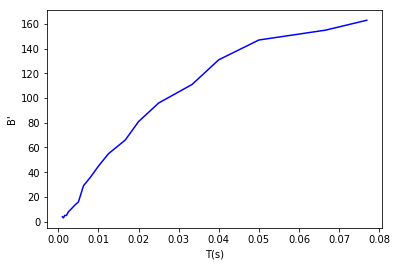

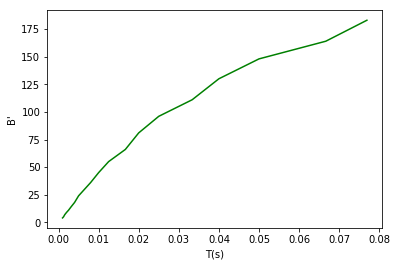

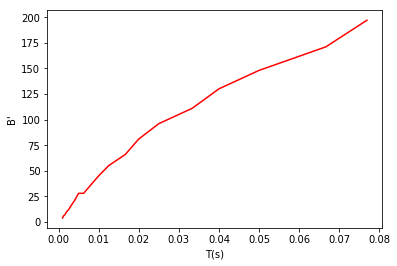

[4, 3, 5, 5, 8, 10, 13, 16, 29, 36, 45, 55, 66, 81, 96, 111, 131, 147, 155, 163, 174, 188, 205, 223, 242, 252, 254] [4, 5, 7, 9, 11, 14, 18, 24, 29, 36, 45, 55, 66, 81, 96, 111, 130, 148, 164, 183, 197, 212, 227, 238, 247, 254, 255] [4, 6, 7, 10, 12, 16, 21, 28, 28, 36, 45, 55, 66, 81, 96, 111, 130, 148, 171, 197, 214, 228, 241, 249, 254, 254, 255]
27


In [28]:
#Part 1
papers = []
path = 'Sunshine'
files = os.listdir(path)
files = sorted(files,  key=lambda x: os.path.getmtime(os.path.join(path, x)))
#files = files[::-1]
print(files)
papers = [] * (len(files) - 1)
for i in range(1, len(files)):
    if not os.path.isdir(files[i]):
        papers.append(cv2.imread(path + '/' + files[i], cv2.IMREAD_COLOR))
#print(papers)

brightnessB, brightnessG, brightnessR = [], [], []
for i in range(len(papers) - 1):
    b, g, r = cv2.split(papers[i])
    bf = b.flatten()
    gf = g.flatten()
    rf = r.flatten()
    brightnessB.append(int(sum(bf) / len(bf)))
    brightnessG.append(int(sum(gf) / len(gf)))
    brightnessR.append(int(sum(rf) / len(rf)))
    #brightnessB, brightnessG, brightnessR = brightnessB[::-1], brightnessG[::-1], brightnessR[::-1]
    

start, end = 0, 20
plt.plot(T[start:end], brightnessB[start:end], 'blue')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessG[start:end], 'green')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessR[start:end], 'red')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
print(brightnessB, brightnessG, brightnessR)
print(len(brightnessB))
#hist(bf, 25)



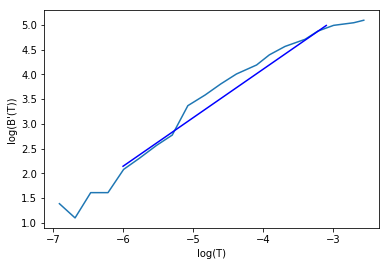

0.981185874741405 8.0298544390135


In [29]:
#plate the figures
#curve fit
def lineTB(x, A, B):
    return A * x + B


T = [1/1000, 1/800, 1/640, 1/500, 1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 0.3, 0.4, 0.5]
logT = [math.log(T[i]) for i in range(len(T))]
logBrightnessB = [math.log(brightnessB[i]) for i in range(len(brightnessB))]
logBrightnessG = [math.log(brightnessG[i]) for i in range(len(brightnessG))]
logBrightnessR = [math.log(brightnessR[i]) for i in range(len(brightnessR))]

#blue channel
aB, kB = optimize.curve_fit(lineTB, logT[start:end], logBrightnessB[start:end])[0]
xB = np.arange(-8, -2, 0.1)
yB = aB * xB + kB
plt.plot(logT[start:end], logBrightnessB[start:end])
plt.plot(xB, yB, 'blue')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aB, kB)
#figureTB(logT, logBrightnessG)

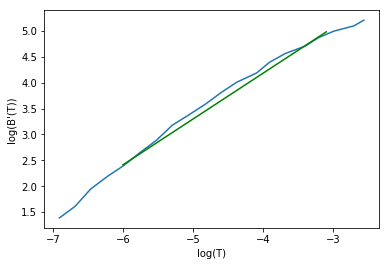

0.8866343440305449 7.733546053869487


In [30]:
#green channe
aG, kG = optimize.curve_fit(lineTB, logT[start:end], logBrightnessG[start:end])[0]
xG = np.arange(-6, -3, 0.1)
yG = aG * xG + kG
plt.plot(logT[start:end], logBrightnessG[start:end])
plt.plot(xG, yG, 'green')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aG, kG)

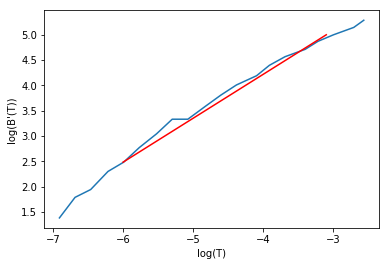

0.8662327870397895 7.682176993002038


In [31]:
#red channe
aR, kR = optimize.curve_fit(lineTB, logT[start:end], logBrightnessR[start:end])[0]
xR = np.arange(-6, -3, 0.1)
yR = aR * xR + kR
plt.plot(logT[start:end], logBrightnessR[start:end])
plt.plot(xR, yR, 'red')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aR, kR)

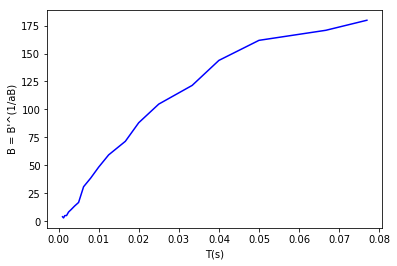

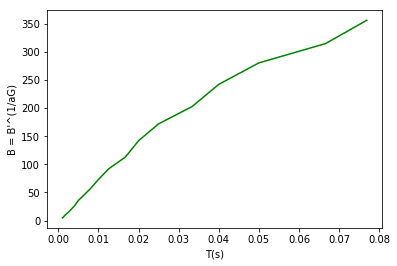

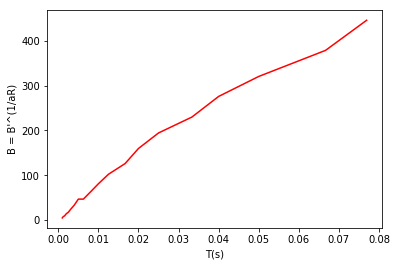

In [32]:

bPrimeB = [brightnessB[i] ** (1 / aB) for i in range(len(brightnessB[start:end]))]
bPrimeG = [brightnessG[i] ** (1 / aG) for i in range(len(brightnessG[start:end]))]
bPrimeR = [brightnessR[i] ** (1 / aR) for i in range(len(brightnessR[start:end]))]
plt.plot(T[start:end], bPrimeB, 'blue')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aB)")
plt.show()
plt.plot(T[start:end], bPrimeG, 'green')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aG)")
plt.show()
plt.plot(T[start:end], bPrimeR, 'red')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aR)")
plt.show()

In [8]:
if isSaturated(b):
    paper.append(cv2.imread('Sunshine/paper 0.4.jpeg', cv2.IMREAD_COLOR))

In [9]:
#paper0 = cv2.imread('Sunshine/paper 1/4.jpeg', cv2.IMREAD_COLOR)
h, w, e = paper[0].shape[:3]
print(h, w, e)

3648 5472 3
